# Лабораторная работа 4.3.2

Предлагается 2 метода определения скорости ультразвука. Обработаем данные для каждого из них:

## 1. По дифракционной картине

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
from matplotlib.ticker import MultipleLocator, ScalarFormatter

In [3]:
data1 = pd.read_csv('data-1.csv')

In [4]:
data1

,v,m,y
0,1.1593,0,0
1,1.1593,1,136
2,1.1593,2,288
3,1.1593,3,428
4,1.1593,4,568
5,2.0983,0,0
6,2.0983,1,264
7,2.0983,-1,-280
8,4.0101,0,0
9,4.0101,1,288


In [5]:
freqs = set(data1['v'].values * 10**6)

In [6]:
freqs

{1159300.0, 2098300.0, 4010100.0000000005, 5000400.0}

#### Для первой частоты $\nu = 1.1593$ МГц

In [7]:
x1 = data1['m'][:5]
y1 = data1['y'][:5]

#### Для второй частоты $\nu = 2.0983$ МГц

In [8]:
x2 = data1['m'][5:8]
y2 = data1['y'][5:8]

#### Для третьей частоты $\nu = 4.0101$ МГц

In [9]:
x3 = data1['m'][8:10]
y3 = data1['y'][8:10]

#### Для четвертой частоты $\nu = 5.0004$ МГц

In [10]:
x4 = data1['m'][10:]
y4 = data1['y'][10:]

### Строим графики $Y_m (m)$

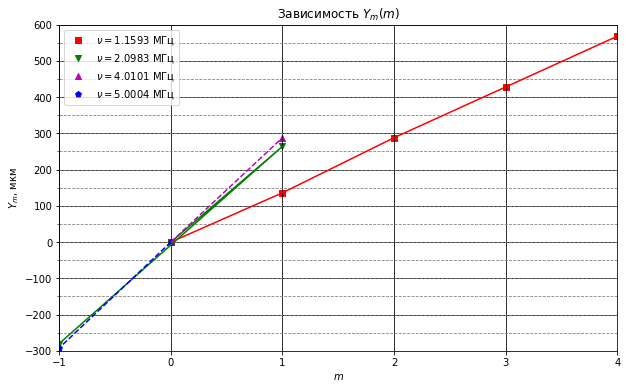

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x1, y1, 'r-', x2, y2, 'g-', x3, y3, 'm--', x4, y4, 'b--', label='')
ax.scatter(x1, y1, c='r', marker='s', label=r'$\nu=1.1593$ МГц')
ax.scatter(x2, y2, c='g', marker='v', label=r'$\nu=2.0983$ МГц')
ax.scatter(x3, y3, c='m', marker='^', label=r'$\nu=4.0101$ МГц')
ax.scatter(x4, y4, c='b', marker='p', label=r'$\nu=5.0004$ МГц')

ax.set_title('Зависимость $Y_m (m)$')
ax.set_xlabel(r'$m$')
ax.set_ylabel(r'$Y_m$, мкм')
ax.set_xlim((-1, 4))
ax.set_ylim((-300, 600))
ax.yaxis.set_minor_locator(MultipleLocator(50))
ax.grid(which='minor', color='grey', linestyle='--')
ax.grid(which='major', color='black')

ax.legend()

In [12]:
# Сохраним график
fig.savefig('out1.pdf')

Пользуясь зависимостью $Y_m = m ~ f_2 \cfrac{\lambda}{\Lambda}$, где 

$\lambda = (6400 \pm 200) \cdot 10^{-10}$ м

$ f = 0.28$ м

получим для всех частот значение $\Lambda (\nu)$:

In [13]:
# Пересчитаем L из угловых коэффициентов по формуле
L = []
L.append(0.28*6400*10**(-10)/LinearRegression(fit_intercept=False).fit(x1.values.reshape(-1,1), y1).coef_[0]*10**6)
L.append(0.28*6400*10**(-10)/LinearRegression(fit_intercept=False).fit(x2.values.reshape(-1,1), y2).coef_[0]*10**6)
L.append(0.28*6400*10**(-10)/LinearRegression(fit_intercept=False).fit(x3.values.reshape(-1,1), y3).coef_[0]*10**6)
L.append(0.28*6400*10**(-10)/LinearRegression(fit_intercept=False).fit(x4.values.reshape(-1,1), y4).coef_[0]*10**6)

In [14]:
L

[0.001259606373008435,
 0.00065882352941176487,
 0.00062222222222222225,
 0.0006136986301369863]

In [15]:
speeds = []
for i, freq in enumerate(sorted(list(freqs))):
    speeds.append(L[i]*freq)

In [16]:
speeds

[1460.2616682286787,
 1382.4094117647062,
 2495.1733333333336,
 3068.7386301369861]

Плохие данные на последних скоростях. Мы их выкинем:

In [17]:
speeds_1 = speeds[:-2]

In [18]:
result_1 = np.mean(speeds_1)

In [19]:
print(r'Скорость звука по первому эксперименту: %s м/с' % result_1)

Скорость звука по первому эксперименту: 1421.33554 м/с


## 2. Метод темного поля

В этом методе все проще, поскольку мы непосредственно измеряем $\cfrac{\Lambda}{2}$. Загрузим данные:

In [20]:
data2 = pd.read_csv('data-2.csv')

In [21]:
data2

,l,v
0,15.0,1.1078
1,8.5,2.0390


Здесь $l$ измеряется в усл. единицах, причем 22 усл. ед. = 1 мм

$\nu$ измеряется в МГц

In [22]:
# Колонка для метров, умножим еще на 2, чтобы l/2 --> l (в эксперименте мерим именно l/2)
data2['l_m'] = data2['l'] / 22 * 10**(-3) * 2

In [23]:
data2

,l,v,l_m
0,15.0,1.1078,0.001364
1,8.5,2.0390,0.000773


In [24]:
speeds = data2['l_m']*data2['v'] * 10**6

In [25]:
speeds

0    1510.636364
1    1575.590909
dtype: float64

Хорошо сходится. Подготовим ответ:

In [26]:
result_2 = speeds.mean()

In [27]:
print(r'Скорость звука по второму эксперименту: %s м/с' % result_2)

Скорость звука по второму эксперименту: 1543.11363636 м/с


## Построим $\Lambda (\nu)$ по двум способам измерения

In [28]:
x1 = data2['v']
y1 = data2['l_m']

x2 = sorted(list(set(data1['v'])))
y2 = L

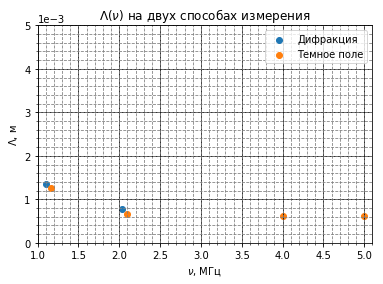

In [29]:
fig, ax = plt.subplots()

ax.scatter(x1, y1, label='Дифракция')
ax.scatter(x2, y2, label='Темное поле')

ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.0002))
ax.set_ylim((0, 0.005))
ax.set_xlim((1, 5.1))
ax.grid(which='major', c='black')
ax.grid(which='minor', c='grey', linestyle='--')
ax.set_title(r'$\Lambda (\nu)$ на двух способах измерения')
ax.set_xlabel(r'$\nu$, МГц')
ax.set_ylabel(r'$\Lambda$, м')
ax.ticklabel_format(style='sci', scilimits=(0, 0))

ax.legend()
fig.savefig('out2.pdf')

## Построим $\Lambda (1/\nu)$ по двум способам измерения

In [ ]:
fig, ax = plt.subplots()

ax.scatter([1/i*10**(-6) for i in x1], y1, label='Дифракция')
ax.scatter([1/i*10**(-6) for i in x2], y2, label='Темное поле')

x1_1 = np.array([1/i*10**(-6) for i in x1])
x2_1 = np.array([1/i*10**(-6) for i in x2])
x_new = np.linspace(0, np.max(np.array([1/i*10**(-6) for i in x1])), 1000)
y_new = LinearRegression(fit_intercept=False).fit(x1_1.reshape(-1,1), y1)\
    .predict(np.linspace(0, np.max(x_new), 1000).reshape(-1,1))
ax.plot(x_new, y_new, label='Аппроксимация дифракции', c='g')

x_new = np.linsapce(0, np.max(np.array([1/i*10**(-6) for i in x2])), 1000)
y_new = LinearRegression(fit_intercept=False).fit(x2_1.reshape(-1, 1), y2)\
    .predict(np.linspace(0, np.max(x_new), 1000).reshape(-1,1))
ax.plot(x_new, y_new, label='Аппроксимация темного поля', c='r')

#ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.0002))
ax.set_ylim((0, 0.005))
xfmt = ScalarFormatter()
ax.xaxis.set_major_formatter(xfmt)
ax.set_xlim((0.0*10**-6, 10**-6))
ax.grid(which='major', c='black')
ax.grid(which='minor', c='grey', linestyle='--')
ax.set_title(r'$\Lambda (1/\nu)$ на двух способах измерения')
ax.set_xlabel(r'$1/\nu$, Гц$^{-1}$')
ax.set_ylabel(r'$\Lambda$, м')
ax.ticklabel_format(style='sci', scilimits=(0, 0))

ax.legend()
fig.savefig('out3.pdf')

In [53]:
with open('result_speed.txt', 'w') as f:
    f.write("По результатам 1-го эксперимента: {} м/с\nПо результатам второго эксперимента: {} м/с"
           .format(result_1.round(2), result_2.round(2)))